+ 试了schaffer这个函数，没求出最优解。先上传一下。 
+ 这个函数太坑坑洼洼了，点容易被挡住，于是把点画在了函数值为2的地方。

这两个博客里介绍了很多种用于评估优化算法的函数：
+ (多目标优化算法的测试函数与解)[https://blog.csdn.net/miscclp/article/details/38102831] 
+ (测试函数： Ackely，Rastrigin，Griewangk，SumSquartes，Sphere，Quartic，Schwefel Problem 12等)[https://blog.csdn.net/luolang_103/article/details/80886865] 


## schaffer函数

2


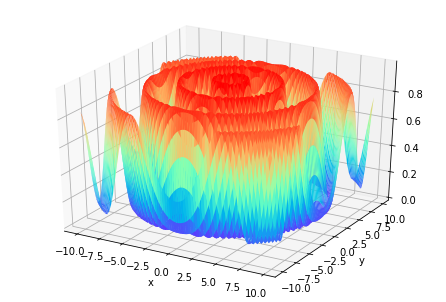

In [157]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
x=np.arange(-10, 10, 0.25)
y=np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(x, y)#网格的创建，这个是关键
x = np.square(X) + np.square(Y)
Z=0.5 + (np.square(np.sin(np.sqrt(x))) - 0.5) / np.square(1 + 0.001 * x)
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

## griewank函数
![](https://bkimg.cdn.bcebos.com/formula/879418ce5f856b53d4e23bbf24f39ab0.svg)

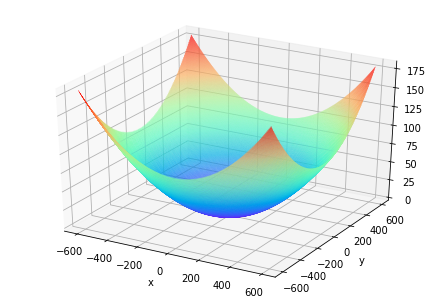

In [293]:
def griewank(p):
    '''
    存在多个局部最小值点，数目与问题的维度有关。
    此函数是典型的非线性多模态函数，具有广泛的搜索空间，是优化算法很难处理的复杂多模态问题。
    在(0,...,0)处取的全局最小值0
    -600<=xi<=600
    '''
    part1 = [np.square(x) / 4000 for x in p]
    part2 = [np.cos(x / np.sqrt(i + 1)) for i, x in enumerate(p)]
    return np.sum(part1) - np.prod(part2) + 1


fig = plt.figure()
ax = Axes3D(fig)
x=np.arange(-600, 600, 2)
y=np.arange(-600, 600, 2)
X, Y = np.meshgrid(x, y)#网格的创建，这个是关键
Z=1+(1/4000)*X**2+(1/4000)*Y**2-np.cos(X)*np.cos(1/2*Y*(2**(1/2)))
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

## rastrigrin函数

    多峰值函数，也是典型的非线性多模态函数 
    -5.12<=xi<=5.12 
    在范围内有10n个局部最小值，峰形高低起伏不定跳跃。很难找到全局最优 
    has a global minimum at x = 0  where f(x) = 0 


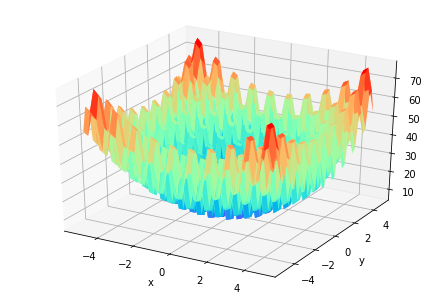

In [166]:
import math

fig = plt.figure()
ax = Axes3D(fig)
x=np.arange(-5.12, 5.12, 0.25)
y=np.arange(-5.12, 5.12, 0.25)
X, Y = np.meshgrid(x, y)#网格的创建，这个是关键
Z=20+X*X+Y*Y-10*(np.cos(2*math.pi*X)+np.cos(2*math.pi*Y))
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

# 模拟退火实验

In [288]:
# 用来求最小值的SA

import pandas as pd
import numpy as np
import random
# import pysnooper
# @pysnooper.snoop()

class SA():
    # 初始化
    def __init__(self,ndims,T_max=1e5,T_min=1e-5,max_iter=100,upper=10,lower=-10,lk=100):
        self.T_max = T_max  # 最大温度
        self.T_min = T_min  # 最小温度
        self.T = T_max  # 初始温度为最大温度
        self.max_iter = max_iter  # 最大迭代次数
        self.upper = upper
        self.lower = lower
        self.ndims = ndims
        self.lk = lk
        self.x_best = []
        self.y_best = []
        
        
    # 降温
    def cool(self):
        self.T = self.T * 0.95
        return self.T
        
    # ========
    # 得到新解
    # ========
    def get_new(self,x):
        y = np.zeros(self.ndims) 
        for i in range(self.ndims):
            y[i] = random.normalvariate(0,1)
        z = y / np.sqrt(sum(y**2))
        x_new = x + z*self.T
        if (x_new[0] or x_new[1]) > self.upper or (x_new[0] or x_new[1]) < self.lower: # 如果新解超出范围，就随机生成
            x_new = np.zeros(self.ndims)  # 随机生成一个解A
            for i in range(self.ndims):
                x_new[i] = self.lower + (self.upper - self.lower)*np.random.uniform(0, 1)
        
        
        return x_new
        
    
    # 一个函数
    def func(self,x):
        '''
        二维函数，具有无数个极小值点、强烈的震荡形态。很难找到全局最优值
        在(0,0)处取的最值0
        -10<=x1,x2<=10
        '''
        x1 = x[0]
        x2 = x[1]
        x = np.square(x1) + np.square(x2)
        return 0.5 + (np.square(np.sin(np.sqrt(x))) - 0.5) / np.square(1 + 0.001 * x)

    # 是否收敛
    def isclose(self, a, b, rel_tol=1e-09, abs_tol=1e-30):  # 用来判断两个浮点数的值是否接近或相等，这是由于浮点数的计算总是存在一定的误差。
        return abs(a - b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)
    
    # 求解
    def solve(self):
        
        i = 0
        
        xA = np.zeros(self.ndims)  # 随机生成一个解A
        for i in range(self.ndims):
            xA[i] = self.lower + (self.upper - self.lower)*np.random.uniform(0, 1)
        self.x_best.append(xA)
        self.y_best.append(self.func(xA))
        
        
        while self.T > self.T_min:
            for j in range(self.lk):  # 内循环次数
                yA = self.func(xA)  # 计算f（A）
                xB = self.get_new(xA)  # 在A附近生成新的解B
                yB = self.func(xB)  # 计算f（B） 
                if yB < yA :
                    xA = xB # 说明xB更好
                else:  # 如果新的解比原来的差，也有一定概率接受
                    p = np.exp(-abs(yA-yB)/100/pow(0.95,i+1))
                    r = np.random.random()
                    if r < p:
                        xA = xB
                    else:
                        xA = xA
                self.T = self.cool()
                self.x_best.append(xA)
                self.y_best.append(self.func(xA))
                
                i = i + 1
            
            print('外循环迭代了'+str(i)+'轮')
    
#             #如果收敛，退出
#             if self.isclose(self.y_best[-1],self.y_best[-2]):
#                 break
        index = self.y_best.index(min(self.y_best))
        print('最优解在'+str(self.x_best[index])+'处取得，函数值为'+str(self.y_best[index]))
            
        return [self.x_best,self.y_best]
            
        
        

In [289]:
SA = SA(2,T_max=1e5,T_min=1e-5,max_iter=100,upper=10,lower=-10,lk=50)
[x_best,y_best] = SA.solve()

外循环迭代了51轮
外循环迭代了101轮
外循环迭代了151轮
外循环迭代了201轮
外循环迭代了251轮
外循环迭代了301轮
外循环迭代了351轮
外循环迭代了401轮
外循环迭代了451轮
最优解在[4.54764704 4.32683543]处取得，函数值为0.0372240751132758


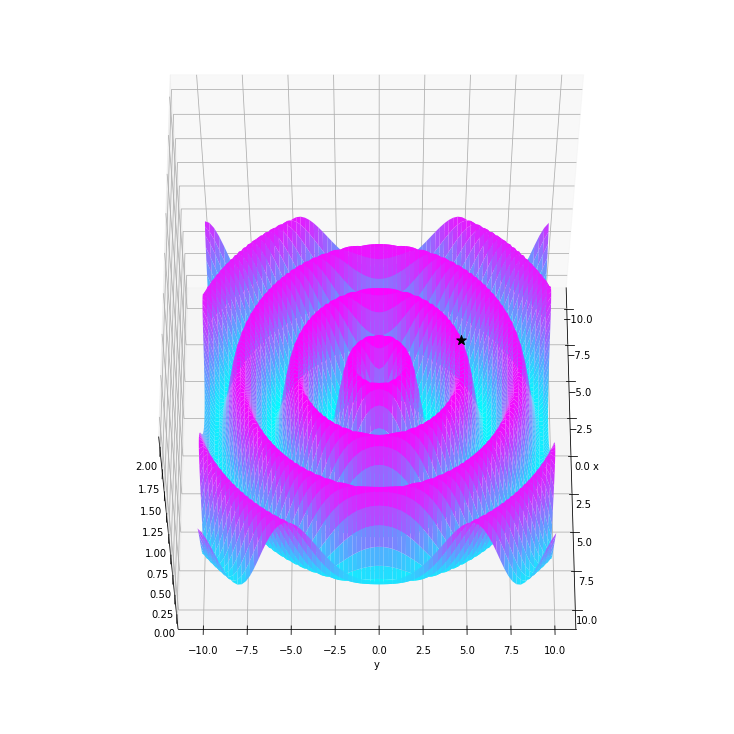

In [290]:
import matplotlib.pyplot as plt

x_best = [x_best,y_best][0]
y_best = [x_best,y_best][1]


from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
index = y_best.index(min(y_best))
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
x=np.arange(-10, 10, 0.25)
y=np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(x, y)#网格的创建，这个是关键
x = np.square(X) + np.square(Y)
Z=0.5 + (np.square(np.sin(np.sqrt(x))) - 0.5) / np.square(1 + 0.001 * x)
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(elev=60, azim=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool')
ax.scatter(x_best[index][0], x_best[index][1],2, marker='*',color='black',s=100)

plt.show()
